<a href="https://colab.research.google.com/github/ML-Bioinfo-CEITEC/ECCB2021/blob/main/notebooks/03_CNN_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [1]:
#Official tutorial source: https://www.tensorflow.org/tutorials/images/cnn
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Creating train, validation and test split
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

valid_images, valid_labels = train_images[45000:], train_labels[45000:]
train_images, train_labels = train_images[:45000], train_labels[:45000]

# Normalize pixel values to be between 0 and 1
train_images, test_images, valid_images = train_images / 255.0, test_images / 255.0, valid_images / 255.0



170500096/170498071 [==============================] - 7s 0us/step


In [2]:
print('TRAIN', train_images.shape)
print('VALID', valid_images.shape)
print('TEST', test_images.shape)

TRAIN (45000, 32, 32, 3)
VALID (5000, 32, 32, 3)
TEST (10000, 32, 32, 3)


[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


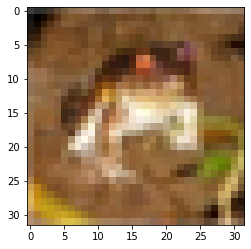

In [4]:
#Showing first training image and its label
#Images are already resized (32x32) and normalized (between 0 and 1)
plt.imshow(train_images[0])
first_image_label = train_labels[0][0]
print(train_images[0])
print('label', first_image_label)

In [5]:
#source https://www.cs.toronto.edu/~kriz/cifar.html
label_dict = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck'
}

print(first_image_label, '=',  label_dict[first_image_label])

6 = frog


# Model

In [14]:
#Defining neural network model
#TODO sync sequential model definitions across notebooks
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='last_conv_layer'))

model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax')) 

Source https://www.researchgate.net/figure/An-example-of-CNN-architecture_fig1_320748406
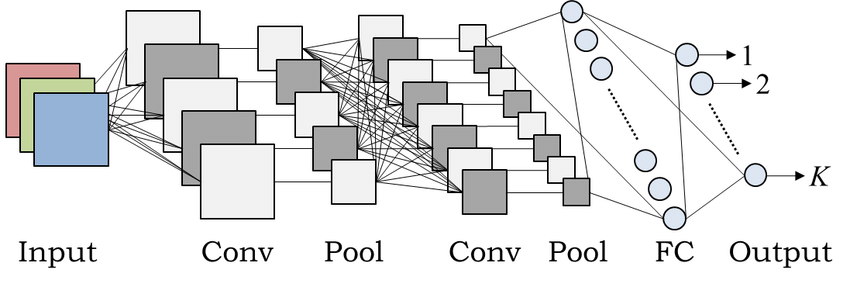

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
last_conv_layer (Conv2D)     (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

# Training

In [16]:
#TODO explain sparse CE (in comparison to OHE)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1407/1407 [==============================] - 6s 4ms/step - loss: 1.5789 - accuracy: 0.4210 - val_loss: 1.3373 - val_accuracy: 0.5238
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2280 - accuracy: 0.5610 - val_loss: 1.1063 - val_accuracy: 0.6180
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0806 - accuracy: 0.6176 - val_loss: 1.0096 - val_accuracy: 0.6496
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9814 - accuracy: 0.6547 - val_loss: 0.9334 - val_accuracy: 0.6776
Epoch 5/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9167 - accuracy: 0.6783 - val_loss: 0.9160 - val_accuracy: 0.6796
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8561 - accuracy: 0.6987 - val_loss: 0.8679 - val_accuracy: 0.7028
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8088 - accuracy: 0.7181 - val_loss: 0.8977 - val_accuracy: 0.6808
Epo

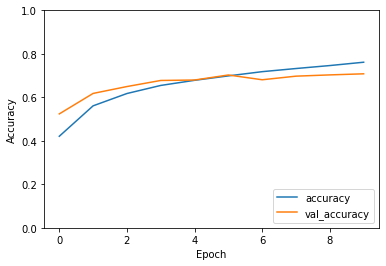

In [17]:
#TODO add epoch 0 accuracy?
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')



# Evaluation

In [18]:
_, test_acc = model.evaluate(test_images,  test_labels, verbose=0)
_, valid_acc = model.evaluate(valid_images,  valid_labels, verbose=0)
_, train_acc = model.evaluate(train_images,  train_labels, verbose=0)

print('ACCURACIES (after the model is finished training)')
print('TRAIN', train_acc)
print('VALID', valid_acc)
print('TEST', test_acc)

#TODO mention overfitting

ACCURACIES (after the model is finished training)
TRAIN 0.7855777740478516
VALID 0.7081999778747559
TEST 0.6960999965667725


# Bonus

In [19]:
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as K
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib

def get_random_test_prediction():
  limit = len(test_images)
  index = np.random.randint(limit)
  img=test_images[index]
  labl = test_labels[index]
  actual_label = label_dict[labl[0]]
  predicted_label = label_dict[np.argmax(model.predict(test_images[index:index+1])[0])]
  print('Prediction is:', actual_label==predicted_label)
  print('Actual label:', actual_label)
  print('Predicted label:', predicted_label)

  matplotlib.image.imsave('temp.png', img)
  gradCAM('temp.png')

#source https://medium.com/analytics-vidhya/visualizing-activation-heatmaps-using-tensorflow-5bdba018f759
def gradCAM(orig, intensity=0.5, res=250):
  DIM = 32
  img = image.load_img(orig, target_size=(DIM, DIM))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x / 255.0

  preds = model.predict(x)

  with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('last_conv_layer')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = heatmap.reshape((4, 4))

  img = cv2.imread(orig)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

  img = heatmap * intensity + img

  cv2_imshow(cv2.resize(cv2.imread(orig), (res, res)))
  cv2_imshow(cv2.resize(img, (res, res)))


Prediction is: True
Actual label: dog
Predicted label: dog


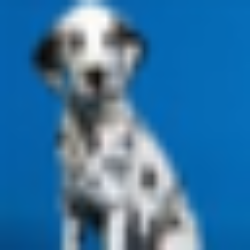

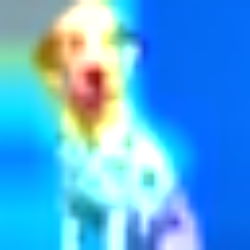

In [40]:
#TODO non-trained network vs trained
#TODO explain why we will need augmentation
get_random_test_prediction()